In [ ]:
# to do : confirm t shrink * and finish plotting

In [1]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt

In [2]:
# define constants, units are Msun, year
pi = np.pi
c2 = 3.993953869e9 
k2 = 4*pi*pi # au^3/(Msun*yr^2)
pctoau = 206264.806

In [3]:
# define other system parameters
e2 = 0.4 # maybe have few e2?

m1 = 1.03  # this should be the mass of the host star
m2 = 1.43e-4 # this should be the mass of the warm Saturn
m3=9.55e-2 # mass of 3rd body

#a2 = 100 # au, maybe have a couple of a2?

In [4]:
def get_a1():
    # define sma of inner planet
    len=200 # 100
    min = -2
    max = 2
    d = (max-min)/(len-1)
    # original method to initialize a1
    a1lg = np.arange(min,max+d,d)
    a1 = 10**a1lg
    
    # not sure if these become useful?
    dt = 9/(len-1)
    tveclg = np.arange(1,11,dt)
    return a1

In [5]:
def timescale_QuadEKL(a1,a2=100):
    # Quad - EKL timescale 
    tquad=2*pi*a2**3*(1-e2*e2)**(3/2.)*np.sqrt(m1+m2)/(a1**(3/2.)*m3*np.sqrt(k2))
    tquadlg=np.log10(tquad)
#    # stability of EKL 
#    a1epsi=0.1*a2*(1-e2*e2)/e2 *tveclg/tveclg
    return tquad

In [6]:
def timescale_GR():
    # GR (1PN) precession timescale
    e1R=0
    tPNa1=2*pi*a1**(5/2.)*c2*(1-e1R*e1R)/(3*np.sqrt(k2**3)*(m1+m2)**(3/2.))
    tPNa1lg=np.log10(tPNa1)
    return tPNa1

In [23]:
def timescale_tides(type, spin1=4, spin2=4):
    # circularization timescales
    TV1= 50. 
    TV2= 0.015 

    # Eggleton's Q, not dissipative quality factor.
    Q1=0.028
    Q2=0.16666
    #"Gyroradii":  I = alpha * M * R^2  
    alpha1=0.08
    alpha2=0.26

    # NOTE this is k1 and not the love paramter. 
    # this k1=0.5*QE/(1-QE) where QE is eggelton Q and not the tidal dissipation one. 
    kL1= 0.0144 #0.0288066
    kL2=5.e-5  ## ice body 

    Rsun=695500*6.68459e-9 # AU
    R1=1*Rsun
    R2=0.045*Rsun #4e-6*Rsun # This is about 4 R_earth, check to have the radius of the planet 

    QoftV1=4.*kL1*4.*pi*pi*m1*(1./365.)*TV1/(3.*(1.+2.*kL1)*(1.+2.*kL1)*R1*R1*R1*2.*pi)
    QoftV2=4.*kL2*4.*pi*pi*m2*(1./365.)*TV2/(3.*(1.+2.*kL2)*(1.+2.*kL2)*(R2*R2*R2)*2.*pi)
    print('%.2E' % Decimal(QoftV1), '%.2E' % Decimal(QoftV2))

    tF1=TV1  *(a1/R1)**8*(m1*m1)/ ( 9.*(m1+m2)*m2*(1+2.*kL1)**2)
    tF2=TV2  *(a1/R2)**8*(m2*m2)/ ( 9.*(m1+m2)*m1*(1+2.*kL2)**2)

    e1=0.001
    e1_2=e1*e1
    e1_4=e1*e1*e1*e1
    e1_6=e1_2*e1_2*e1_2
    e1_8=e1_4*e1_4
    k2=4*pi*pi

#    spin1=4 # change these
#    spin2=4 # spins of star and inner planet

    spin1=2.*pi*365.25/spin1
    spin2=2.*pi*365.25/spin2
    beta =0
    spin1h=spin1*np.cos(beta) #radians or degrees? assuming here beta is in deg
    spin1q =np.sqrt(( (spin1*spin1)-(spin1h*spin1h))/2. )
    spin1e=spin1q

    spin2h=spin2
    spin2q =np.sqrt(( (spin2*spin2)-(spin2h*spin2h))/2. )
    spin2e=spin2q

    P1 = 2*pi*np.sqrt(a1*a1*a1/(k2*(m1+m2)))
    n = 2.*pi/P1
    # paramters for the spins
    In1=alpha1*m1*R1*R1
    In2=alpha2*m2*R2*R2
    mu=m1*m2/(m1+m2)

    V1= 9.*( (1. +15./4. *e1_2 +15./ 8. *e1_4+ 5./64. *e1_6)/(1.-(e1*e1))**(13./2.) - 11.* spin1h / (18. * n )*( 1. + 3./2. * e1_2 + e1_4/8.)/(1-e1_2)**(5) ) / tF1
    V2= 9.*( (1. +15./4. *e1_2 +15./ 8. *e1_4+ 5./64. *e1_6)/(1.-e1_2)**(13./2.) - 11.* spin2h / (18. * n )*( 1. + 3./2.* e1_2 + e1_4/8.)/(1-e1_2)**(5) ) / tF2
    W1= ( (1. +15./2. *e1_2 +45./ 8. *e1_4+ 5./16. *e1_6)/(1.-e1_2)**(13./2.) - spin1h / ( n )*( 1. + 3.* e1_2 + 3. *e1_4/8.)/(1-e1_2)**(5) ) / tF1
    W2= ( (1. +15./2. *e1_2 +45./ 8. *e1_4+ 5./16. *e1_6)/(1.-e1_2)**(13./2.) - spin2h / ( n )*( 1. + 3.* e1_2 + 3. *e1_4/8.)/(1-e1_2)**(5) ) / tF2 
    X1= -(R1/a1)**(5) *kL1*m2/(mu *n ) *spin1h*spin1e/((1-e1_2)*(1-e1_2)) - spin1q / (2. *n *tF1 ) *( 1. +9. /2. * e1_2 + 5./ 8. *e1_4 )/(1.-e1_2)**(5)
    Y1= -(R1/a1)**(5) *kL1*m2/(mu *n ) *spin1h*spin1q/((1-e1_2)*(1-e1_2)) + spin1e / (2. *n *tF1 ) *( 1. +3. /2. * e1_2 + 1./ 8. *e1_4 )/(1.-e1_2)**(5)
    Z1= (R1/a1)**(5) *kL1*m2/(mu *n ) * ( (2* (spin1h*spin1h)- (spin1q*spin1q)- (spin1q*spin1q) )/ (2.* (1-e1_2)*(1-e1_2) )+ 15. * k2 *m2 / a1**(3)*( 1. +3. /2. * e1_2 + 1./ 8. *e1_4 )/(1.-e1_2)**(5))
    X2= -(R2/a1)**(5) *kL2*m1/(mu *n ) *spin2h*spin2e/((1-e1_2)*(1-e1_2)) - spin2q / (2. *n *tF2 ) *( 1. +9. /2. * e1_2 + 5./ 8. *e1_4 )/(1.-e1_2)**(5)
    Y2= -(R2/a1)**(5) *kL2*m1/(mu *n ) *spin2h*spin2q/((1-e1_2)*(1-e1_2)) + spin2e / (2. *n *tF2 ) *( 1. +3. /2. * e1_2 + 1./ 8. *e1_4 )/(1.-e1_2)**(5)
    Z2= (R2/a1)**(5) *kL2*m1/(mu *n ) * ( (2* (spin2h*spin2h)- (spin2q*spin2q)- (spin2q*spin2q) )/ (2.* (1-e1_2)*(1-e1_2))+ 15. * k2 *m1 / a1**(3)*( 1. +3. /2. * e1_2 + 1./ 8. *e1_4 )/(1.-e1_2)**(5))  

    # circulization timescale due to tides on the star + planet
    if type == 'e,star+planet':
        eedot=np.abs(1/(V1+V2))
        eedot=np.abs(1/(V2))
        te1lg=np.log10(eedot)
        return eedot
    
    # circulization timescale due to tides on the star
    if type == 'e,star':
        eedotStar = np.abs(1/(V1))
        te1lgStar = np.log10(eedotStar)
        return eedotStar
    
    # circulization timescale due to tides on the planet
    if type == 'e,planet':
        eedotPlanet=np.abs(1/(V2))
        te1lgPlanet=np.log10(eedotPlanet)
        return eedotPlanet

    # shrinking of the planet's SMA timescale due to tides on the planet 
    if type == 'a,planet':
        ta1=np.abs(1/((W2)+(V2)*2*e1*e1/(1-e1_2)))
        ta1lg=np.log10(ta1)
        return ta1
    
    # shrinking of the planet's SMA timescale due to tides on the star
    # not entirely sure if this is right??
    if type == 'a,star':
        ta1=np.abs(1/((W1)+(V1)*2*e1*e1/(1-e1_2)))
        return ta1

    # not sure what this code does
    g1=0
    i1=40*3.14/180
    BigOmegadot=((X1+X2)*np.sin(g1) + (Y1+Y2)*np.cos(g1) )/(np.sin(i1))
    tg1=np.abs(2*3.14/(Z1+Z2-BigOmegadot*np.cos(i1)))
    tg1lg=np.log10(tg1)

In [24]:
# plot figure to check
a1 = get_a1()
tquad = timescale_QuadEKL(a1,a2=100)
tPNa1 = timescale_GR()
eedotPlanet = timescale_tides(type='e,planet')
eedotStar = timescale_tides(type='e,star')
ta1 = timescale_tides(type='a,planet')

1.60E+05 2.69E-01
1.60E+05 2.69E-01
1.60E+05 2.69E-01


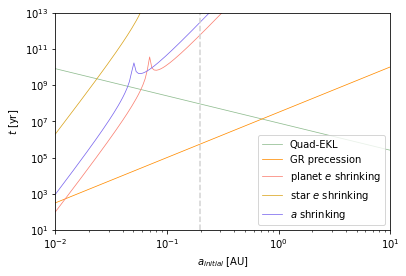

In [25]:
# plot figure to check
plt.loglog(a1,tquad, color='darkseagreen', linestyle='-', label='Quad-EKL', linewidth=0.75)
plt.loglog(a1,tPNa1,color='darkorange', linestyle='-', label='GR precession',linewidth=0.75)
plt.loglog(a1, eedotPlanet, color='salmon', linestyle='-', label='planet $e$ shrinking', linewidth=0.75)
plt.loglog(a1, eedotStar, color='goldenrod', linestyle='-', label='star $e$ shrinking', linewidth=0.75)
plt.loglog(a1,ta1, color='mediumslateblue', label='$a$ shrinking',linewidth=0.75)
plt.xlabel(r'$a_{initial}$ [AU]')
plt.ylabel(r'$t$ [yr]')
plt.axvline(x=0.197, linestyle='--', color='lightgrey')
plt.legend()#bbox_to_anchor=(1.1,0.75))
#plt.title('$m_3 = $' +str(m3) + '$M_\odot$, '+ '$a_2 = $'+str(a2) + 'AU')
plt.ylim(10,1e13)
plt.xlim(0.01,10)
plt.show()

In [26]:
# plot for multiple spin values
eedotPlanet_low = timescale_tides(type='e,planet',spin1=1,spin2=1)
eedotStar_low = timescale_tides(type='e,star',spin1=1,spin2=1)
ta1_low = timescale_tides(type='a,planet',spin1=1,spin2=1)
tastar_low = timescale_tides(type='a,star+planet',spin1=1,spin2=1)

eedotPlanet_high = timescale_tides(type='e,planet',spin1=30,spin2=30)
eedotStar_high = timescale_tides(type='e,star',spin1=30,spin2=30)
ta1_high = timescale_tides(type='a,planet',spin1=30,spin2=30)
tastar_high = timescale_tides(type='a,star',spin1=30,spin2=30)

# plot EKL for multiple spin values
tquad_a2100 = tquad
tquad_a21000 = timescale_QuadEKL(a1,a2=1000)
tquad_a220 = timescale_QuadEKL(a1,a2=20)

1.60E+05 2.69E-01
1.60E+05 2.69E-01
1.60E+05 2.69E-01
1.60E+05 2.69E-01
1.60E+05 2.69E-01
1.60E+05 2.69E-01
1.60E+05 2.69E-01
1.60E+05 2.69E-01


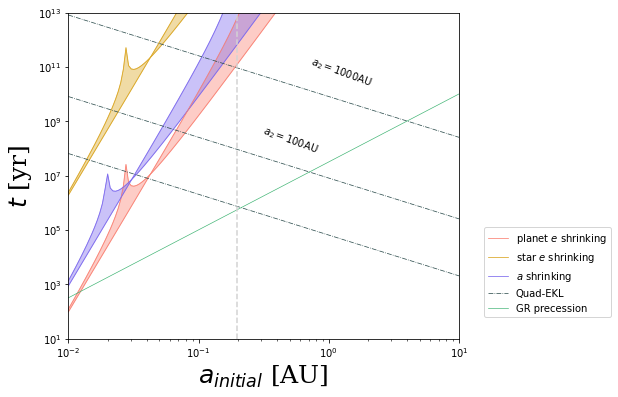

In [27]:
fig, ax = plt.subplots(figsize=(7,6))

# plot tide timescale for spin=1
ax.plot(a1, eedotPlanet_low, color='salmon', linestyle='-', label='planet $e$ shrinking', linewidth=0.75)
ax.plot(a1, eedotStar_low, color='goldenrod', linestyle='-', label='star $e$ shrinking', linewidth=0.75)
ax.plot(a1,ta1_low, color='mediumslateblue', label='$a$ shrinking',linewidth=0.75)

# tide timescale for spin=30
ax.plot(a1, eedotPlanet_high, color='salmon', linestyle='-', linewidth=0.75)
ax.plot(a1, eedotStar_high, color='goldenrod', linestyle='-', linewidth=0.75)
ax.plot(a1,ta1_high, color='mediumslateblue',linestyle = '-',linewidth=0.75)

# shade timescale region
ax.fill_between(a1, eedotPlanet_low, eedotPlanet_high, color='salmon', alpha=0.4)
ax.fill_between(a1, eedotStar_low, eedotStar_high, color='goldenrod', alpha=0.4)
ax.fill_between(a1, ta1_low, ta1_high, color='mediumslateblue', alpha=0.4)

# plot EKL timescales
plt.loglog(a1,tquad_a2100, color='darkslategrey', linestyle='-.', label='Quad-EKL', linewidth=0.75)
plt.loglog(a1,tquad_a21000, color='darkslategrey', linestyle='-.', linewidth=0.75)
plt.loglog(a1,tquad_a220, color='darkslategrey', linestyle='-.', linewidth=0.75)

# plot GR timescale
plt.loglog(a1,tPNa1,color='mediumseagreen', linestyle='-', label='GR precession',linewidth=0.65)


ax.text(0.3,0.7e8,'$a_2=100$AU',rotation=-20)
ax.text(0.7,2e10,'$a_2=1000$AU',rotation=-20)
ax.set_xlabel(r'$a_{initial}$ [AU]',fontsize=25,family='serif')
ax.set_ylabel(r'$t$ [yr]',fontsize=25,family='serif')
ax.axvline(x=0.197, linestyle='--', color='lightgrey')
ax.set_ylim(10,1e13);ax.set_yscale('log')
ax.set_xlim(0.01,10);ax.set_xscale('log')
ax.legend(loc = 'lower left', bbox_to_anchor = (1.05,0.05))

In [28]:
cshrink = 'blue'
ccircs = 'orangered'
ccircp = 'hotpink'
cgr = 'midnightblue'
ashade = 0.6
cage = 'palegoldenrod'
csep = 'crimson'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

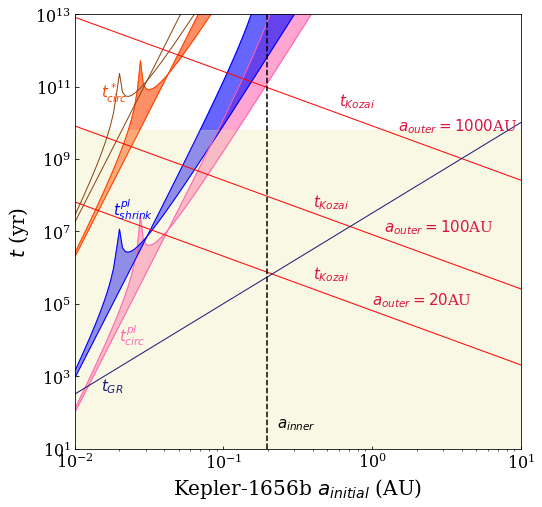

In [29]:
fig, ax = plt.subplots(figsize=(8,8))

# plot tide timescale for spin=1
ax.plot(a1, eedotPlanet_low, color=ccircp, linestyle='-', label='planet $e$ shrinking', linewidth=1)
ax.plot(a1, eedotStar_low, color=ccircs, linestyle='-', label='star $e$ shrinking', linewidth=1)
ax.plot(a1,ta1_low, color=cshrink, label='$a$ shrinking',linewidth=1)
ax.plot(a1, tastar_low, color='saddlebrown', linewidth=1)

# tide timescale for spin=30
ax.plot(a1, eedotPlanet_high, color=ccircp, linestyle='-', linewidth=1)
ax.plot(a1, eedotStar_high, color=ccircs, linestyle='-', linewidth=1)
ax.plot(a1,ta1_high, color=cshrink,linestyle = '-',linewidth=1)
ax.plot(a1, tastar_high, color='saddlebrown', linewidth=1)

# shade timescale region
ax.fill_between(a1, eedotPlanet_low, eedotPlanet_high, color=ccircp, alpha=ashade)
ax.fill_between(a1, eedotStar_low, eedotStar_high, color=ccircs, alpha=ashade)
ax.fill_between(a1, ta1_low, ta1_high, color=cshrink, alpha=ashade)
ax.axhspan(0,6.31e9, alpha=0.3,color=cage)

# plot EKL timescales
plt.loglog(a1,tquad_a2100, color='r', linestyle='-', label='Quad-EKL', linewidth=1)
plt.loglog(a1,tquad_a21000, color='r', linestyle='-', linewidth=1)
plt.loglog(a1,tquad_a220, color='r', linestyle='-', linewidth=1)

# plot GR timescale
plt.loglog(a1,tPNa1,color=cgr, linestyle='-', label='GR precession',linewidth=1)

ax.text(1.0,0.95e5,'$a_{outer}=20$AU',rotation=0, color=csep, fontsize=15,family='serif')
ax.text(1.2,1e7,'$a_{outer}=100$AU',rotation=0, color=csep, fontsize=15,family='serif')
ax.text(1.5,0.6e10,'$a_{outer}=1000$AU',rotation=0, color=csep, fontsize=15,family='serif')
ax.text(0.23,40,'$a_{inner}$',rotation=0, color='k', fontsize=15,family='serif')

ax.text(0.4,5e5,'$t_{Kozai}$',rotation=0, color=csep, fontsize=15,family='serif')
ax.text(0.4,5e7,'$t_{Kozai}$',rotation=0, color=csep, fontsize=15,family='serif')
ax.text(0.6,3e10,'$t_{Kozai}$',rotation=0, color=csep, fontsize=15,family='serif')
ax.text(0.015,4e2,'$t_{GR}$',rotation=0, color=cgr, fontsize=15,family='serif')
ax.text(0.018,3e7,'$t^{pl}_{shrink}$',rotation=0, color=cshrink, fontsize=15,family='serif')
ax.text(0.015,5e10,'$t^*_{circ}$',rotation=0, color=ccircs, fontsize=15,family='serif')
ax.text(0.02,1e4,'$t^{pl}_{circ}$',rotation=0, color=ccircp, fontsize=15,family='serif')

ax.set_xlabel(r'Kepler-1656b $a_{initial}$ (AU)',fontsize=20,family='serif')
ax.set_ylabel(r'$t$ (yr)',fontsize=20,family='serif')
ax.axvline(x=0.197, linestyle='--', color='k')
ax.set_ylim(10,1e13);ax.set_yscale('log')
ax.set_xlim(0.01,10);ax.set_xscale('log')
ax.tick_params(axis='x', direction='in');ax.tick_params(axis='y', direction='in')
plt.setp(ax.get_xticklabels(), fontsize=16, family='serif')
plt.setp(ax.get_yticklabels(), fontsize=16, family='serif')